# Curvature Gap Visualization

We compute Ricci curvature distributions of stochastic block models to illustrate the curvature gap phenomenon. We begin by importing the necessary libraries.

In [1]:
import networkx as nx
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import sys
import os

sys.path.append(os.path.abspath('..'))
from ricci_curvatures import Ricci_Curvature_Calculator

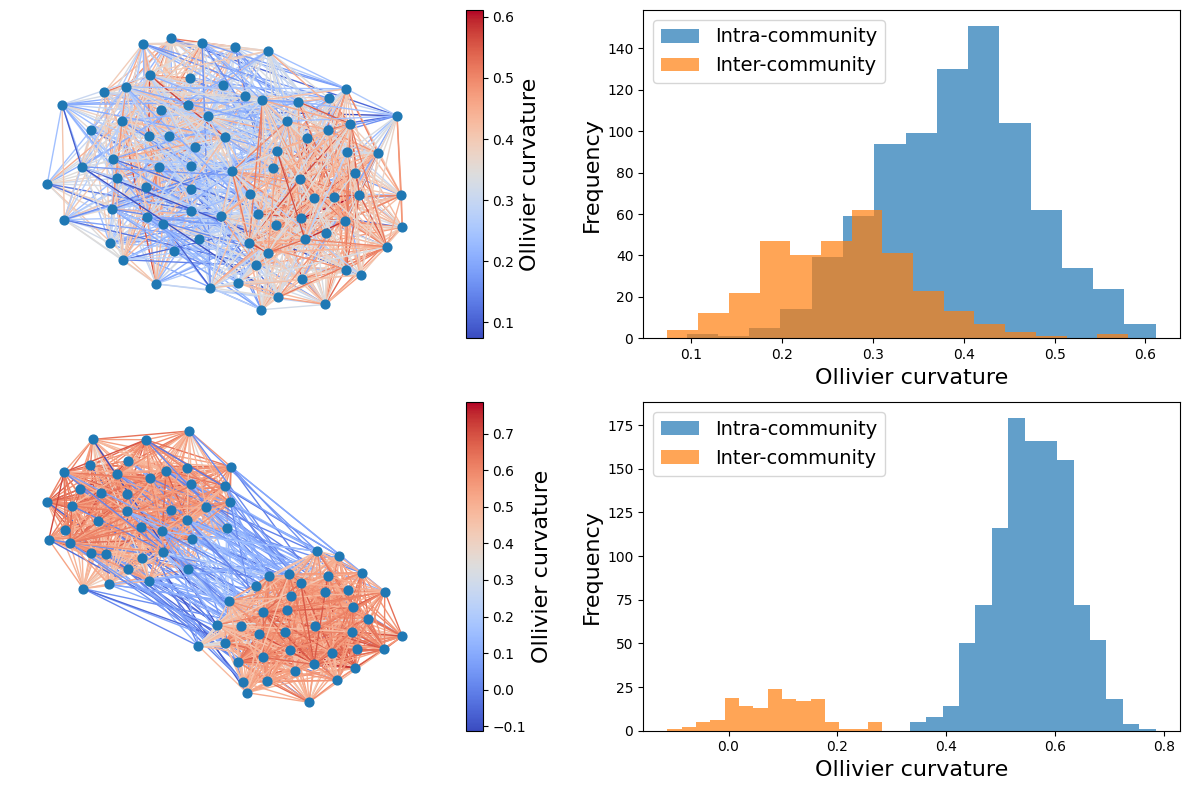

In [ ]:
# Generate SBM graphs
G1 = nx.stochastic_block_model([40,40], [[0.5, 0.2], [0.2, 0.5]])
G2 = nx.stochastic_block_model([40,40], [[0.7,0.1], [0.1,0.7]])


# Calculate Ollivier-Ricci curvatures
ollivier_curvature1 = Ricci_Curvature_Calculator(csr_matrix(nx.to_numpy_array(G1))).ollivier_ricci()
edge_curvatures1 = [ollivier_curvature1[i,j] for i,j in G1.edges()]
ollivier_curvature2 = Ricci_Curvature_Calculator(csr_matrix(nx.to_numpy_array(G2))).ollivier_ricci()
edge_curvatures2 = [ollivier_curvature2[i,j] for i,j in G2.edges()]

# Sort curvatures depending on the edge is an inter- or intra-community edge
within_edges1 = [ollivier_curvature1[i, j] for i, j in G1.edges() if (i < 40 and j < 40) or (i >= 40 and j >= 40)]
between_edges1 = [ollivier_curvature1[i, j] for i, j in G1.edges() if (i >= 40 and j < 40) or (i < 40 and j >= 40)]
within_edges2 = [ollivier_curvature2[i, j] for i, j in G2.edges() if (i < 40 and j < 40) or (i >= 40 and j >= 40)]
between_edges2 = [ollivier_curvature2[i, j] for i, j in G2.edges() if (i >= 40 and j < 40) or (i < 40 and j >= 40)]

# Plot results
pos1 = nx.spring_layout(G1, seed=42)
pos2 = nx.spring_layout(G2, seed=42)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
nx.draw(
    G1, pos1,
    edge_color=edge_curvatures1,
    edge_cmap=plt.cm.coolwarm,
    with_labels=False,
    node_size=40
)
sm = ScalarMappable(cmap=plt.cm.coolwarm)
sm.set_array(edge_curvatures1)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Ollivier curvature', fontsize=16)

plt.subplot(2,2,2)
plt.hist(within_edges1, label="Intra-community", bins=15, alpha=0.7)
plt.hist(between_edges1, label="Inter-community", bins=15, alpha=0.7)
plt.xlabel("Ollivier curvature", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.legend(fontsize=14, loc="upper left")

plt.subplot(2,2,3)
nx.draw(
    G2, pos2,
    edge_color=edge_curvatures2,
    edge_cmap=plt.cm.coolwarm,
    with_labels=False,
    node_size=40
)
sm = ScalarMappable(cmap=plt.cm.coolwarm)
sm.set_array(edge_curvatures2)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Ollivier curvature', fontsize=16)

plt.subplot(2,2,4)
plt.hist(within_edges2, label="Intra-community", bins=15, alpha=0.7)
plt.hist(between_edges2, label="Inter-community", bins=15, alpha=0.7)
plt.xlabel("Ollivier curvature", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.legend(fontsize=14, loc="upper left")
plt.tight_layout()
plt.savefig('../plots/curvature_gap_visualization.png', bbox_inches="tight", dpi=300)